<a href="https://colab.research.google.com/github/ttaahhaa/machine-learning/blob/main/ann_Churn_Modeling_after_hesham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [19]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Removing the duplicate data

In [14]:
# Dropping the duplicate rows
duplicate_rows = dataset[dataset.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

dataset.drop_duplicates(inplace=True)

number of duplicate rows :  (0, 14)


### Checking the null

SUM : 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


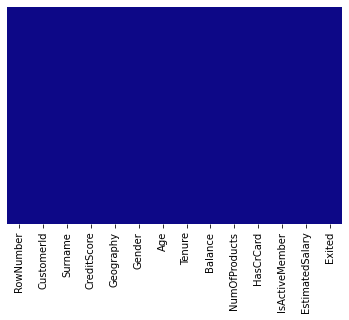

In [15]:
# To check missing values
print("SUM : \n",dataset.isnull().sum())
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap="plasma")

# df["col"] = df["col"].fillna(df["col"].mean())
# df["col"] = df["col"].fillna(df["col"].interpolate())

In [ ]:
dataset = dataset.drop('CustomerId', 1)
dataset = dataset.drop('Surname', 1)
dataset = dataset.drop('RowNumber', 1)

In [43]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
X[:,18] = le.fit_transform(X[:,18])
X[:,19] = le.fit_transform(X[:,19])
X[:,20] = le.fit_transform(X[:,20])
X[:,21] = le.fit_transform(X[:,21])
X[:,22] = le.fit_transform(X[:,22])
X[:,23] = le.fit_transform(X[:,23])

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

ValueError: ignored

ValueError: ignored

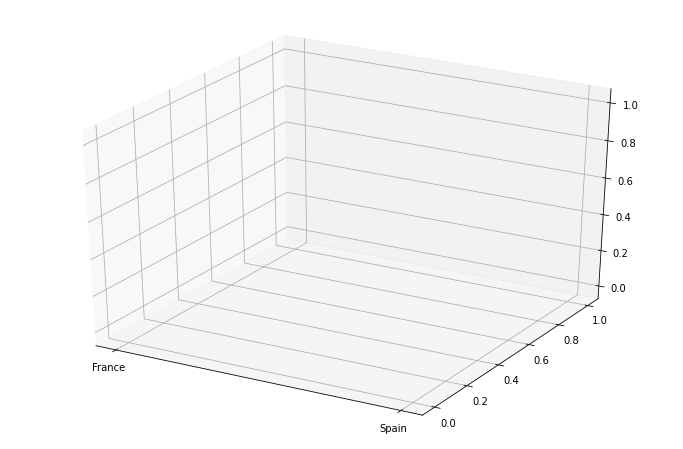

In [31]:
# 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X.iloc[:, 4], X.iloc[:, 1], y, c="b", marker="o", cmap=plt.cm.Set1, edgecolor="k", s=20)
ax.set_title("My Data")
ax.set_xlabel("Feature 0")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Price")
ax.w_zaxis.set_ticklabels([])
plt.show()
